In [92]:
import glob
import numpy as np
import cv2
import glob
import os
import pickle
import matplotlib
from skimage.feature import hog
import matplotlib.pyplot as plt

#import matplotlib.image as mpimg
%matplotlib inline

## Explore Dataset
So far I know there are two classes of images, vehicles and non-vehicles

In [2]:
basedir = './trainingdata'
img_types = os.listdir(basedir)
#print(img_types)

['non-vehicles', 'vehicles']


In [31]:
cars=[]
notcars=[]

images = glob.glob(basedir + '/**/**/*.png')
print(images[0])

for image in images:
    if 'non-vehicles' in image:
        notcars.append(image)
    else:
        cars.append(image)

print('Number of car images: ' + str(len(cars)))
print('Number of not-car images: ' + str(len(notcars)))

./trainingdata\non-vehicles\Extras\extra1.png
Number of car images: 8792
Number of not-car images: 8968


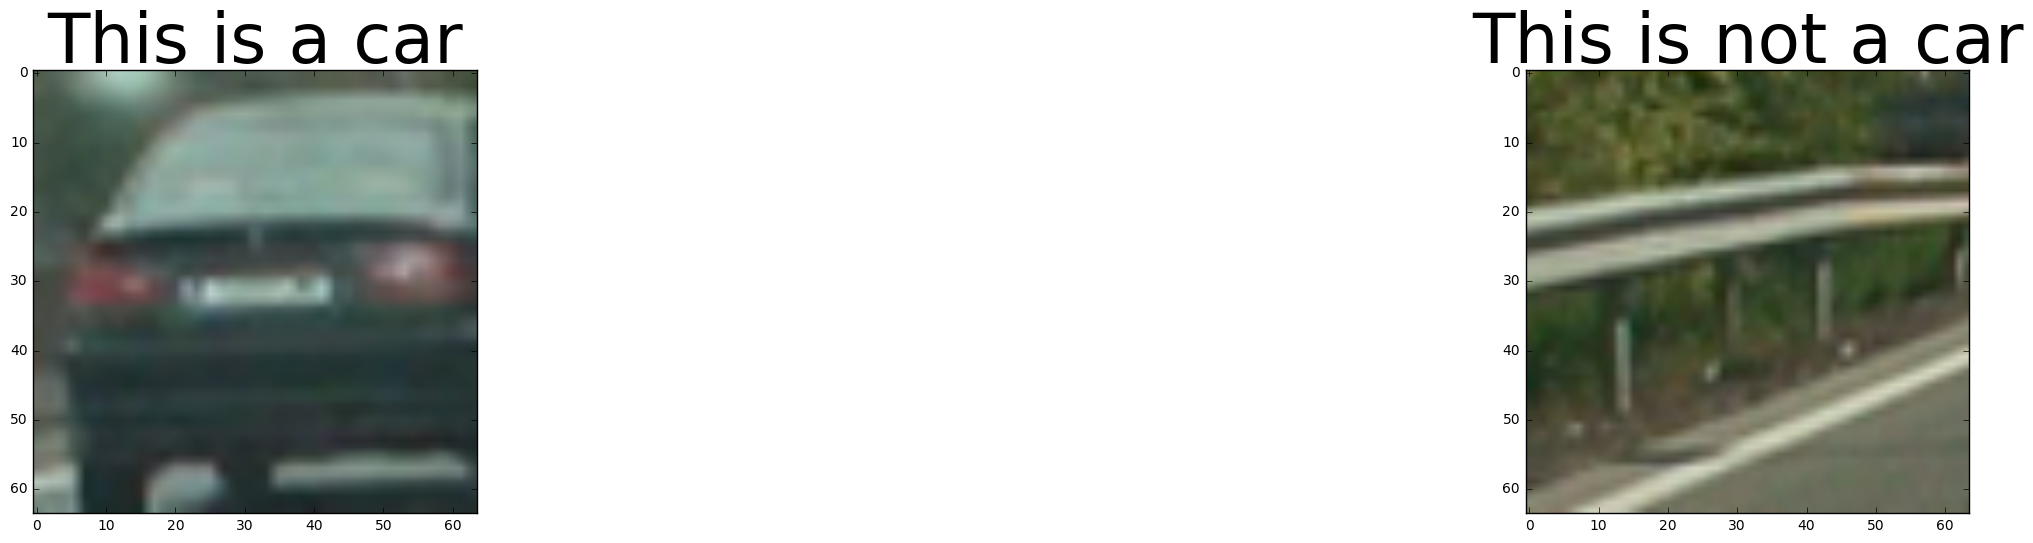

In [85]:
idx_cars = np.random.randint(0, len(cars))
img_car = cv2.cvtColor(cv2.imread(cars[idx_cars]), cv2.COLOR_BGR2RGB)

idx_notcars = np.random.randint(0, len(notcars))
img_notcar = cv2.cvtColor(cv2.imread(notcars[idx_notcars]), cv2.COLOR_BGR2RGB)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))
f.tight_layout()
ax1.imshow(img_car)
ax1.set_title('This is a car', fontsize=50)

ax2.imshow(img_notcar)
ax2.set_title('This is not a car', fontsize=50)

In [110]:
def color_hist(img, nbins=32, bins_range=(0, 256), visualize=False, title=None):
    '''
    A function to compute color histogram features 
    '''    
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    if (visualize==True):
        # Plot the result
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 5))
        f.tight_layout()
        
        ax1.plot(channel1_hist[0])
        ax1.set_title(title+' Ch1', fontsize=50)

        #ax2.imshow(channel2_hist)
        ax2.plot(channel2_hist[0])
        ax2.set_title(title+' Ch2', fontsize=50)

        #ax3.imshow(channel3_hist)
        ax3.plot(channel3_hist[0])
        ax3.set_title(title+' Ch3', fontsize=50)

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

array([   1,    8,  370,  929, 1404,  908,  326,   62,   39,   27,   20,
          2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          4,   54,  296,  510,  577,  332,  259,  177,  172,  165,  152,
        227,  224,  274,  208,  173,  112,   61,   52,   27,   12,   11,
          5,    5,    1,    3,    1,    1,    0,    0,    1,    0,    0,
          0,    0,    6,   45,  197,  364,  489,  611,  434,  222,  181,
        344,  288,   95,  132,  118,   65,   57,   56,   86,   90,   63,
         60,   51,   39,    3,    0,    0,    0,    0], dtype=int64)

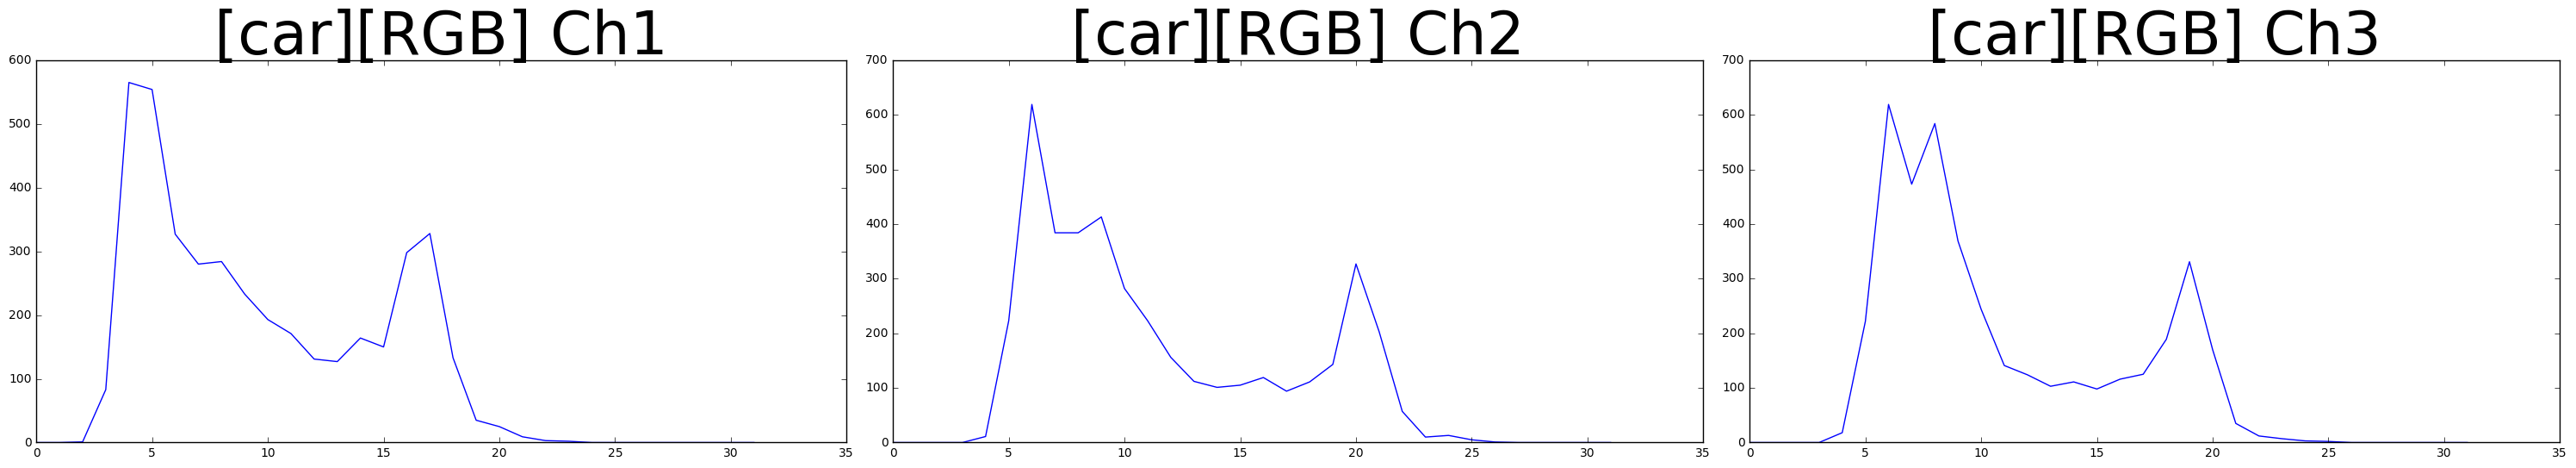

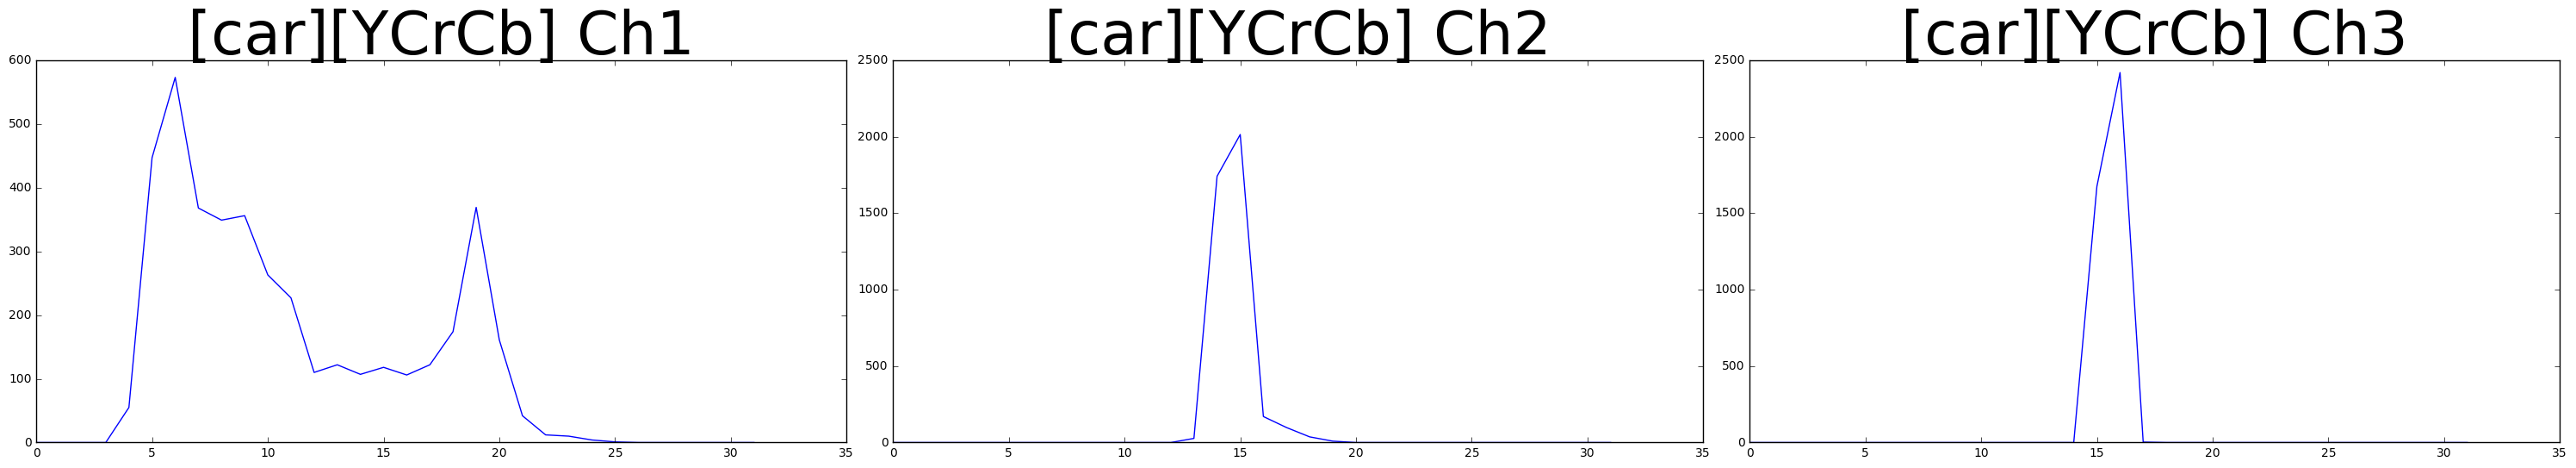

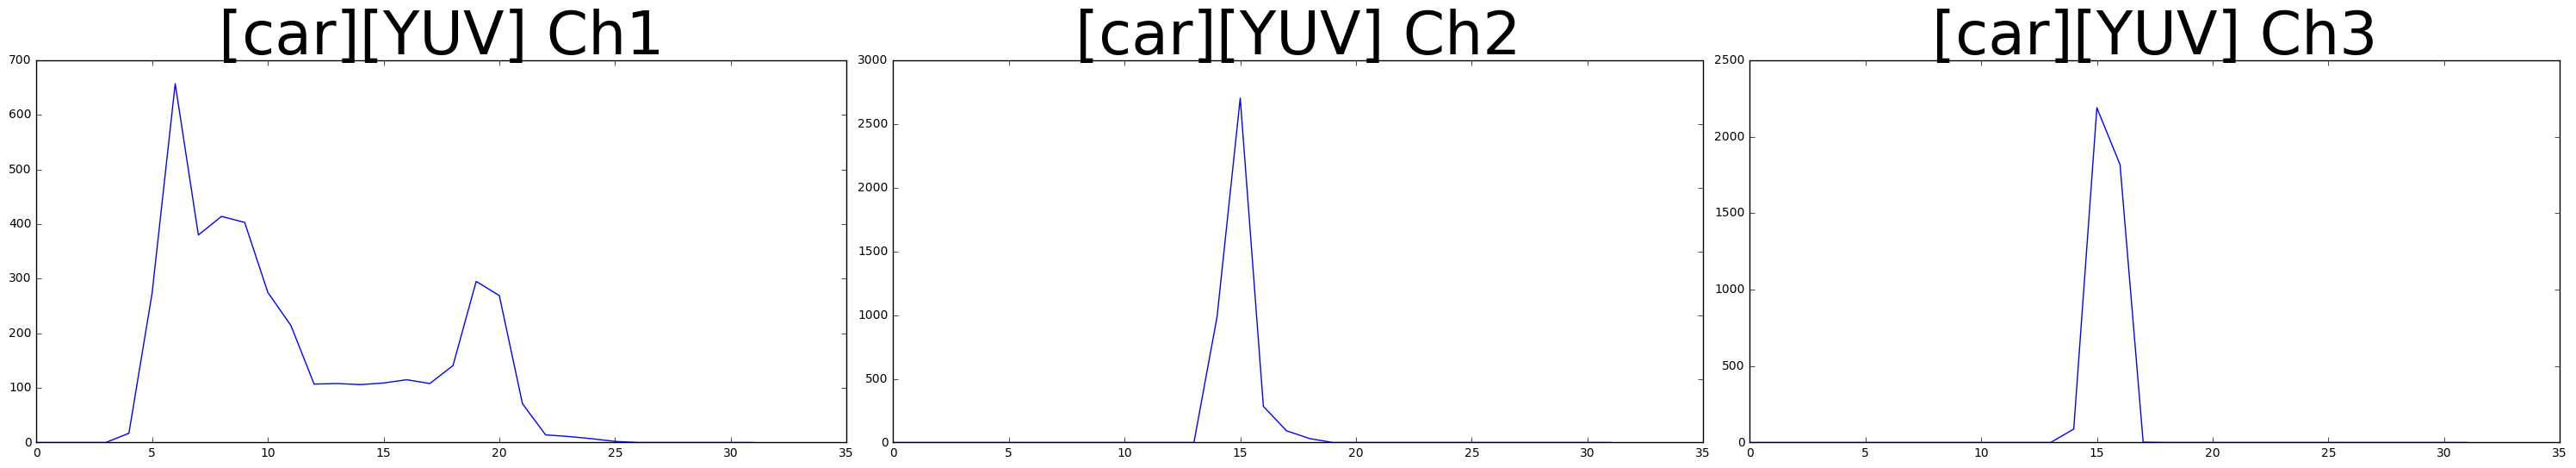

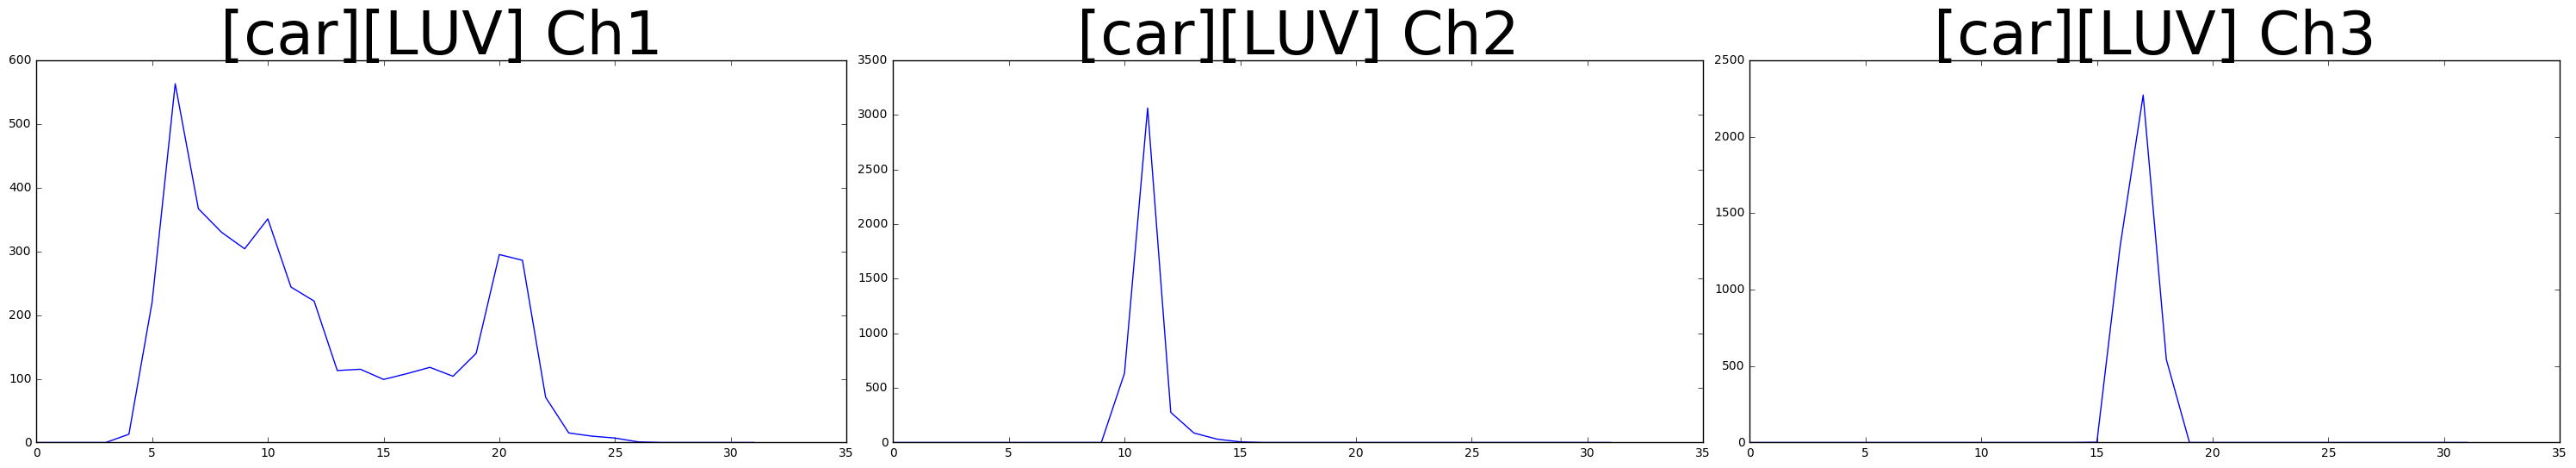

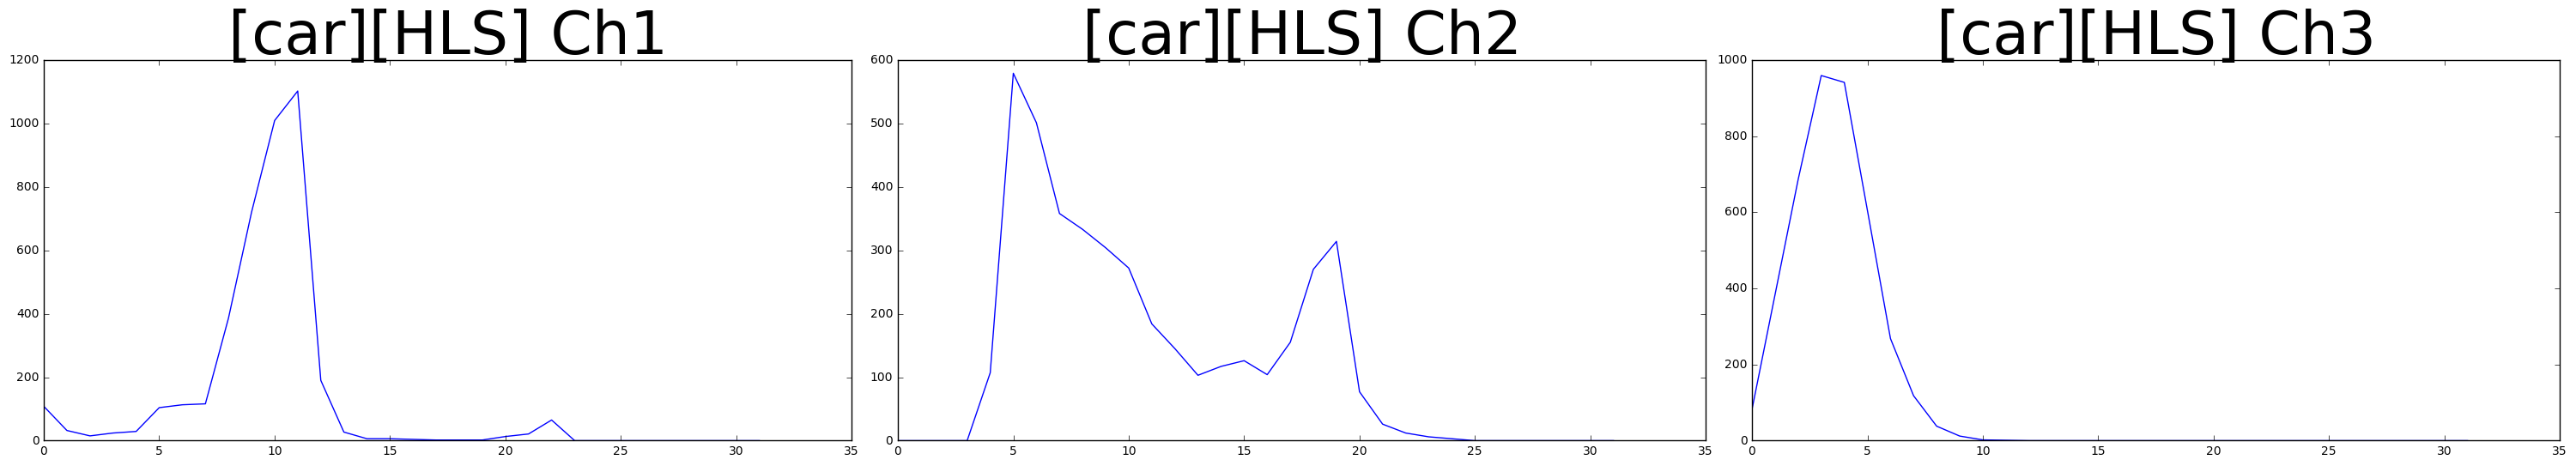

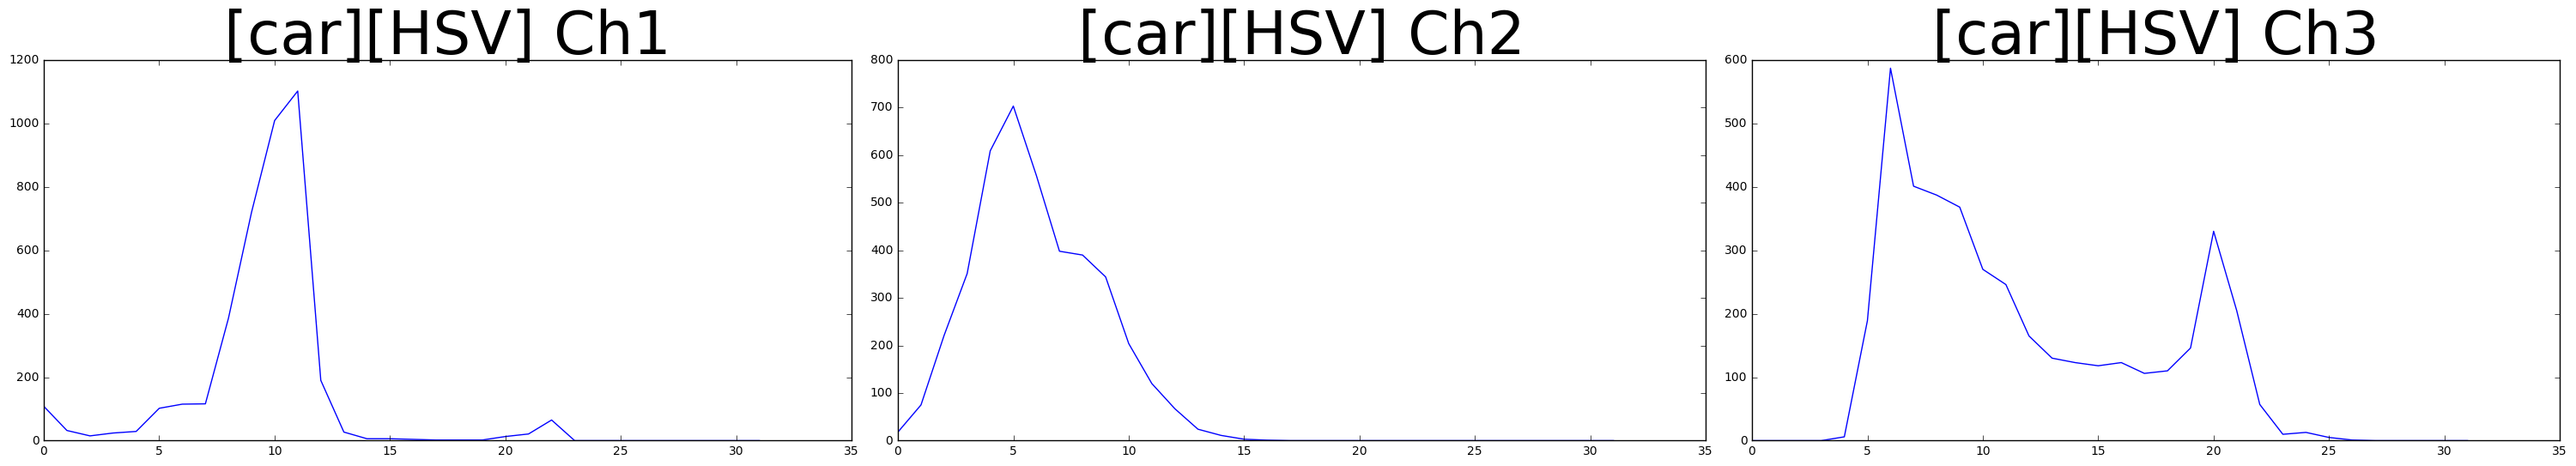

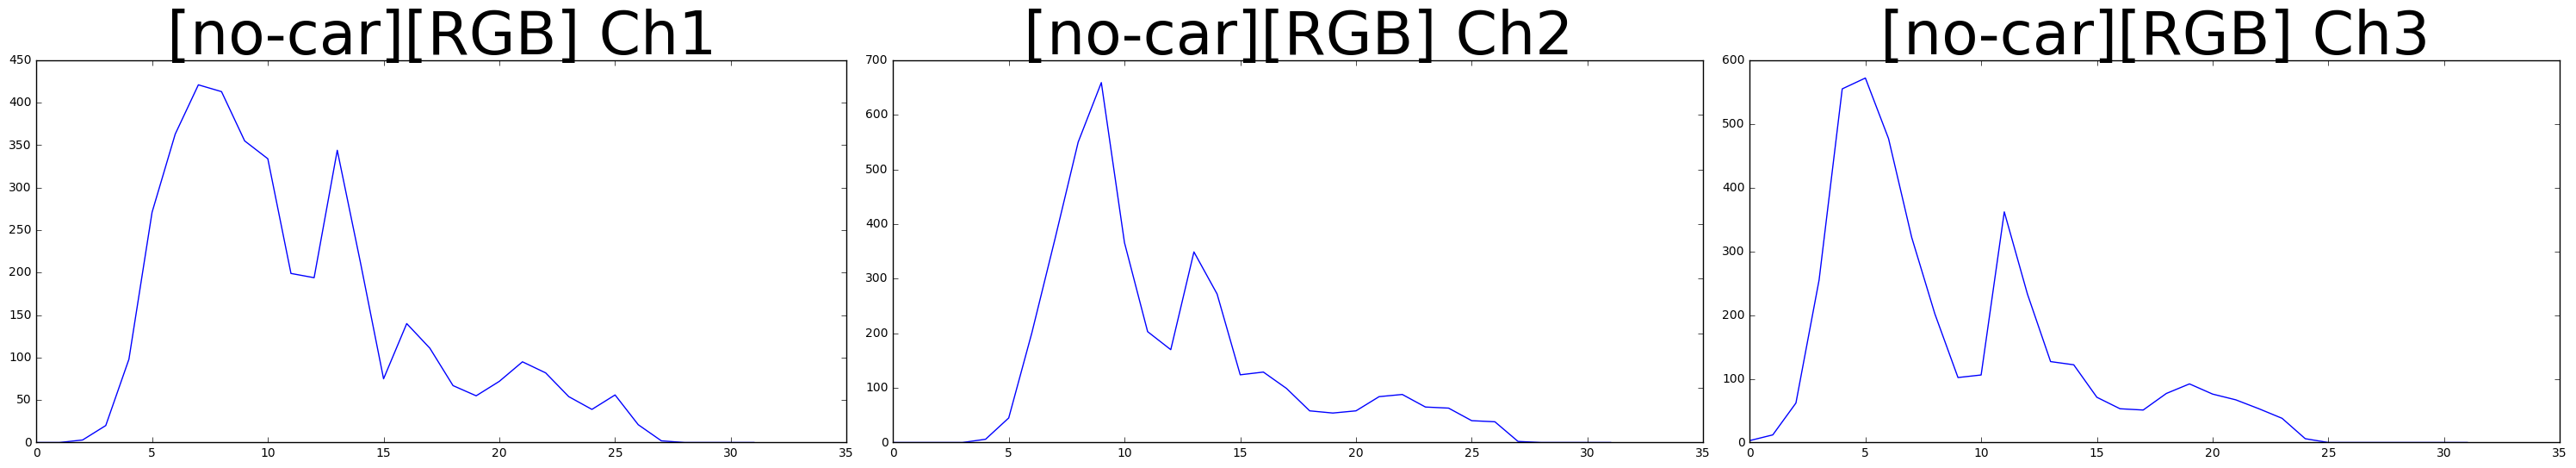

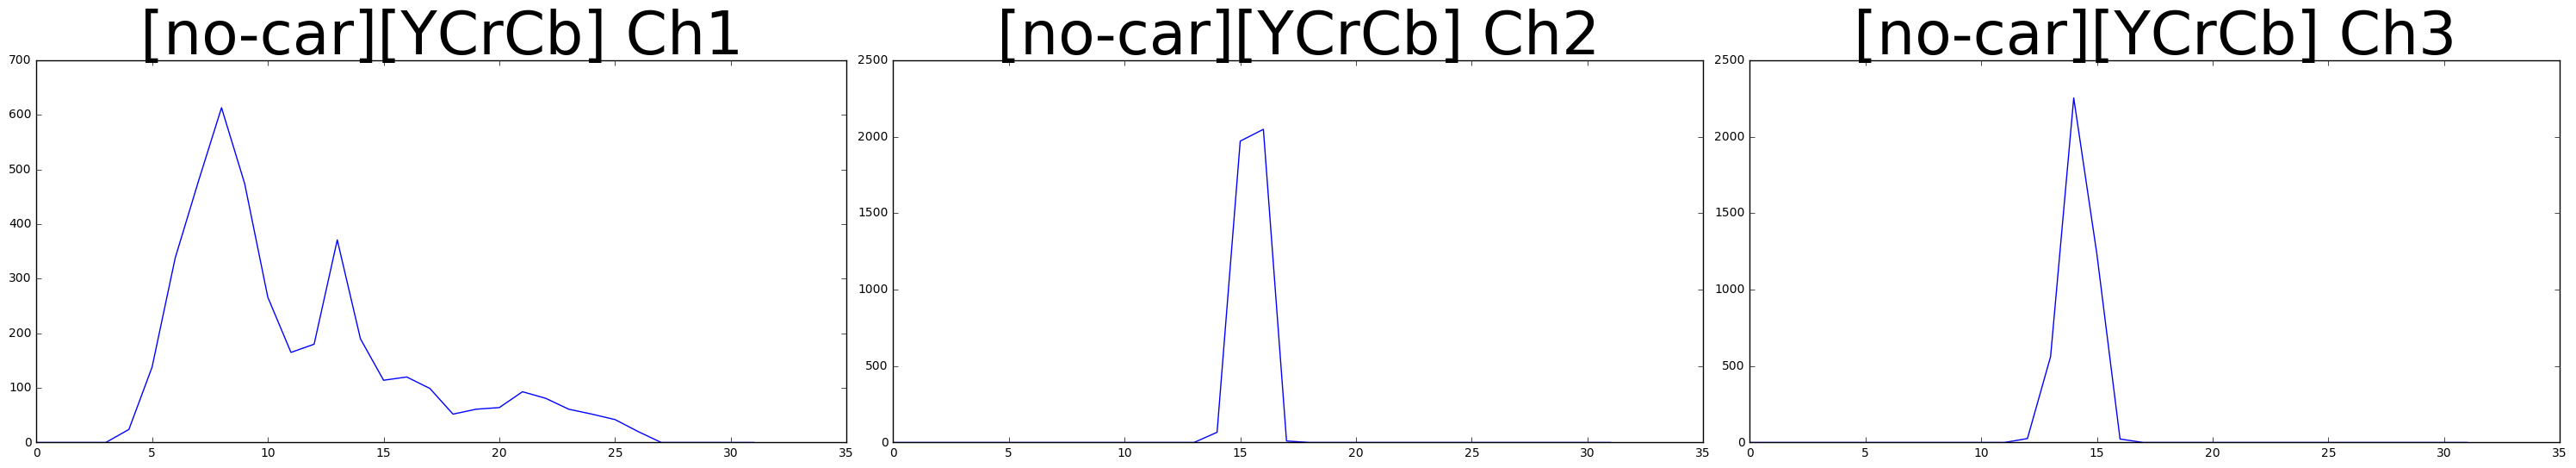

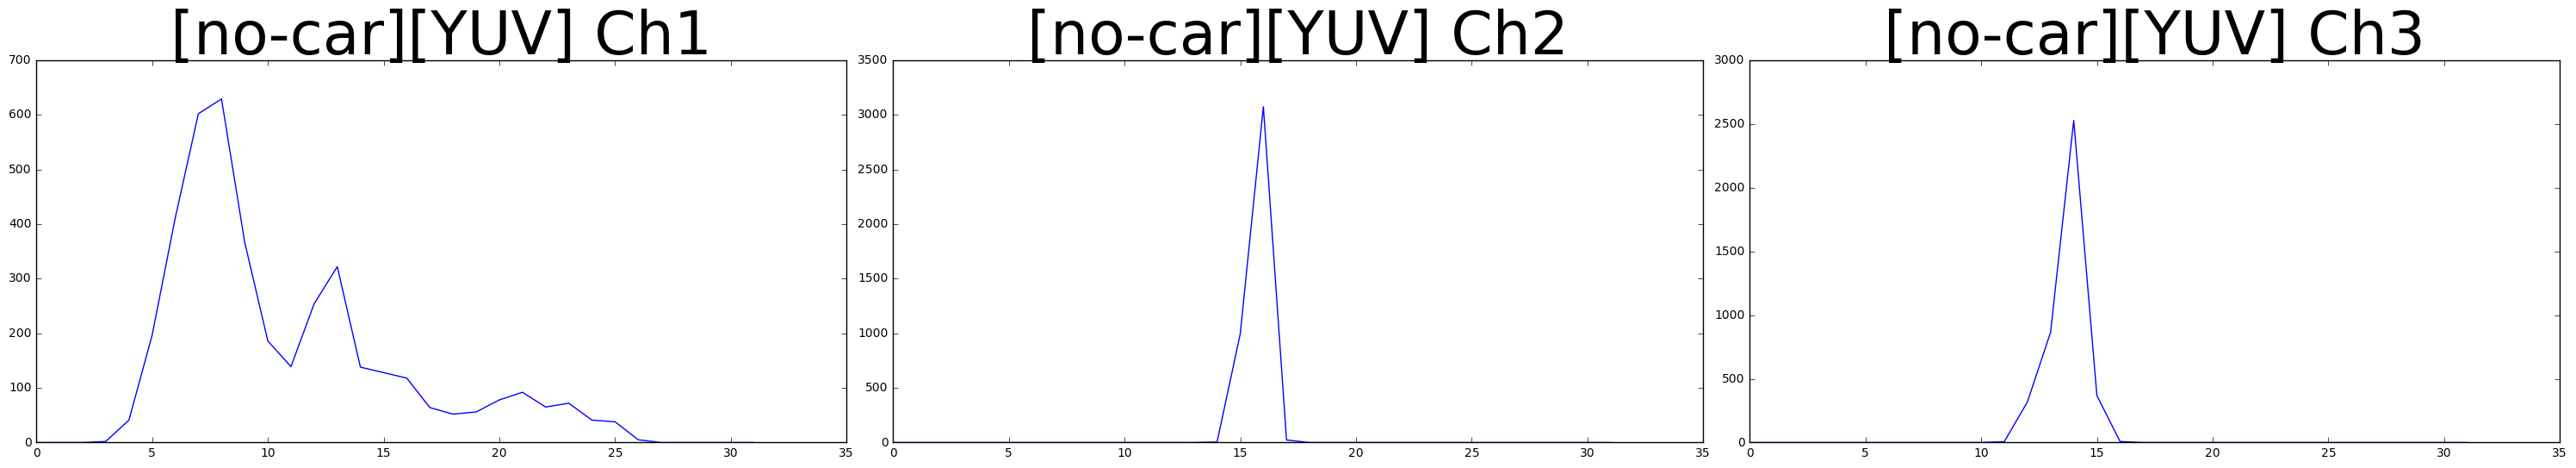

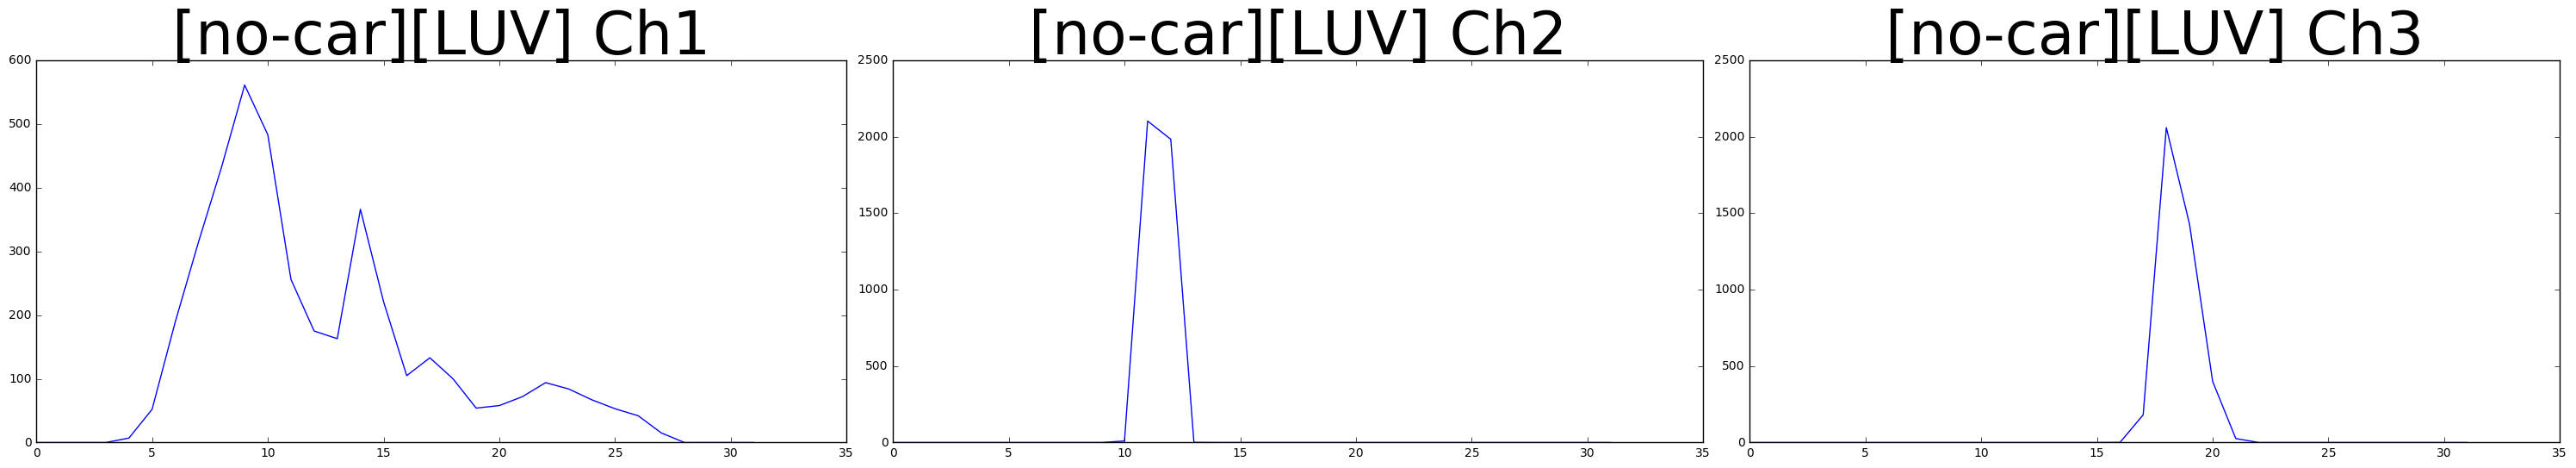

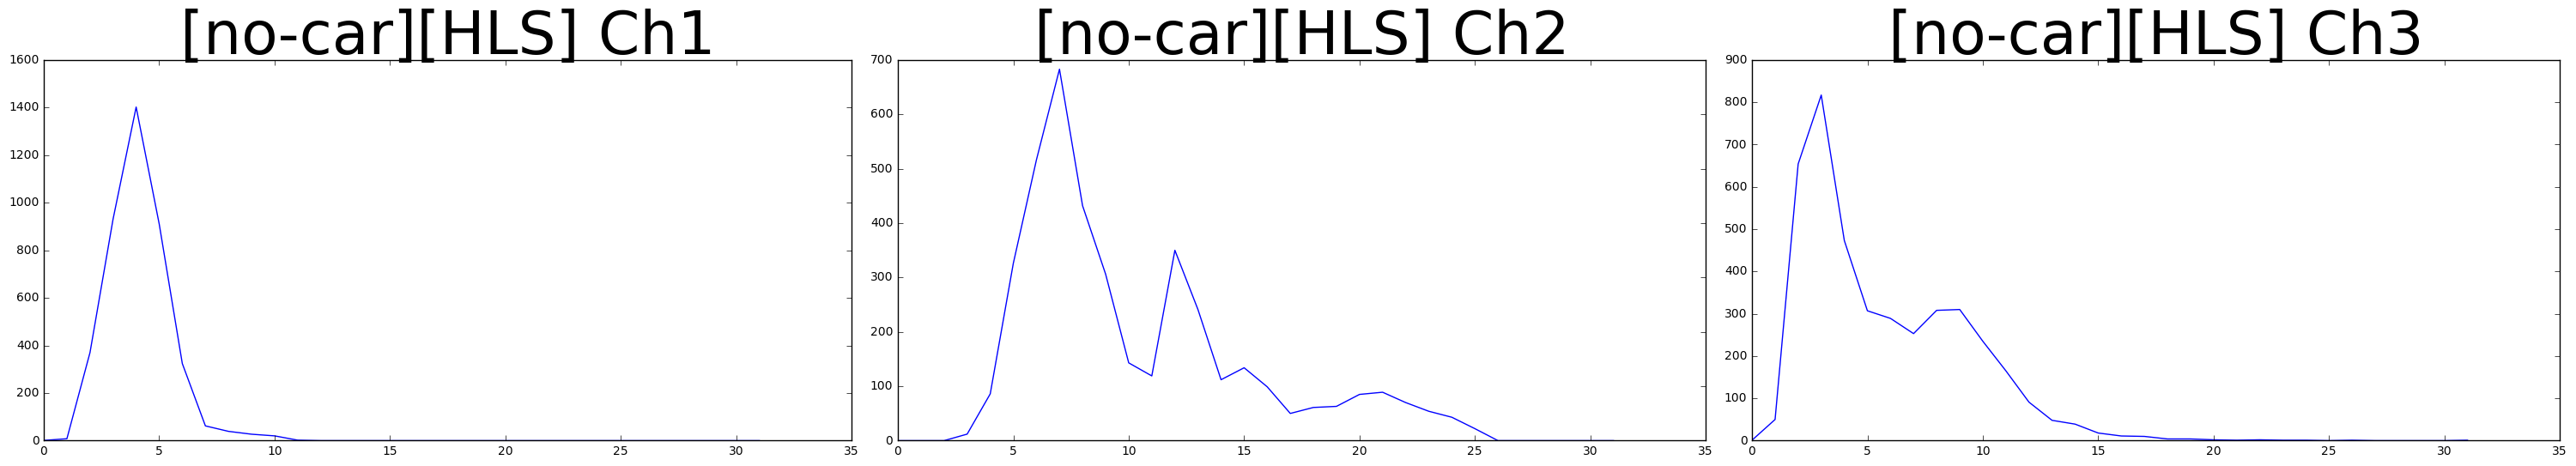

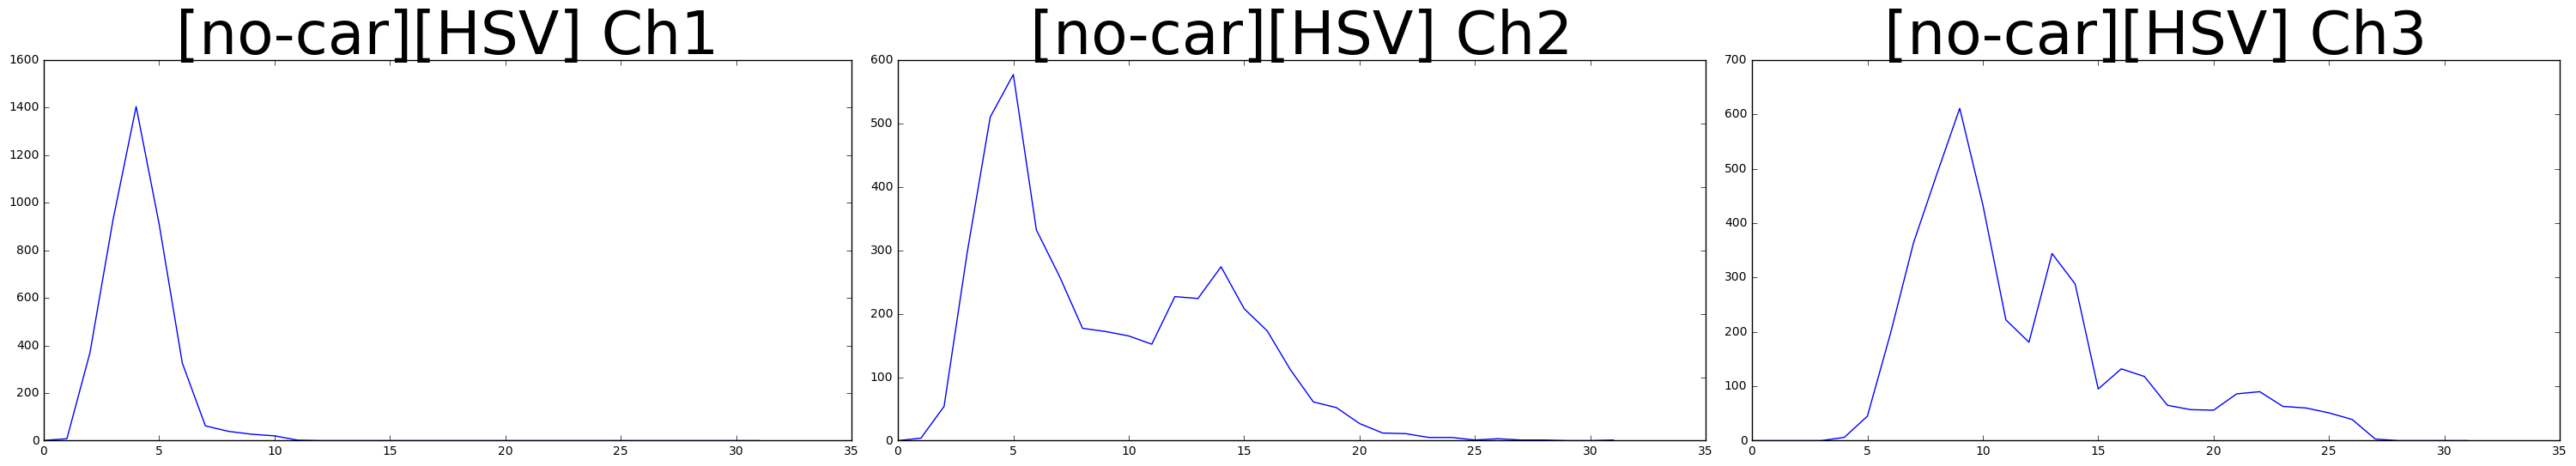

In [115]:
#Visualize the color histogram on the car image
color_hist(img_car, visualize=True, title='[car][RGB]')
color_hist(cv2.cvtColor(img_car, cv2.COLOR_RGB2YCrCb), visualize=True, title='[car][YCrCb]')
color_hist(cv2.cvtColor(img_car, cv2.COLOR_RGB2YUV), visualize=True, title='[car][YUV]')
color_hist(cv2.cvtColor(img_car, cv2.COLOR_RGB2LUV), visualize=True, title='[car][LUV]')
color_hist(cv2.cvtColor(img_car, cv2.COLOR_RGB2HLS), visualize=True, title='[car][HLS]')
color_hist(cv2.cvtColor(img_car, cv2.COLOR_RGB2HSV), visualize=True, title='[car][HSV]')

#Test the color histogram on the notcar image
color_hist(img_notcar, visualize=True, title='[no-car][RGB]')
color_hist(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2YCrCb), visualize=True, title='[no-car][YCrCb]')
color_hist(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2YUV), visualize=True, title='[no-car][YUV]')
color_hist(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2LUV), visualize=True, title='[no-car][LUV]')
color_hist(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2HLS), visualize=True, title='[no-car][HLS]')
color_hist(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2HSV), visualize=True, title='[no-car][HSV]')

In [112]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    '''
    Function to return HOG features and visualization
    '''
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features


def bin_spatial(img, size=(32, 32)):
    '''
    Function to compute binned color features  
    '''
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

## Messed around with histogram of gradients (HOG) using different colorspaces and other parameters

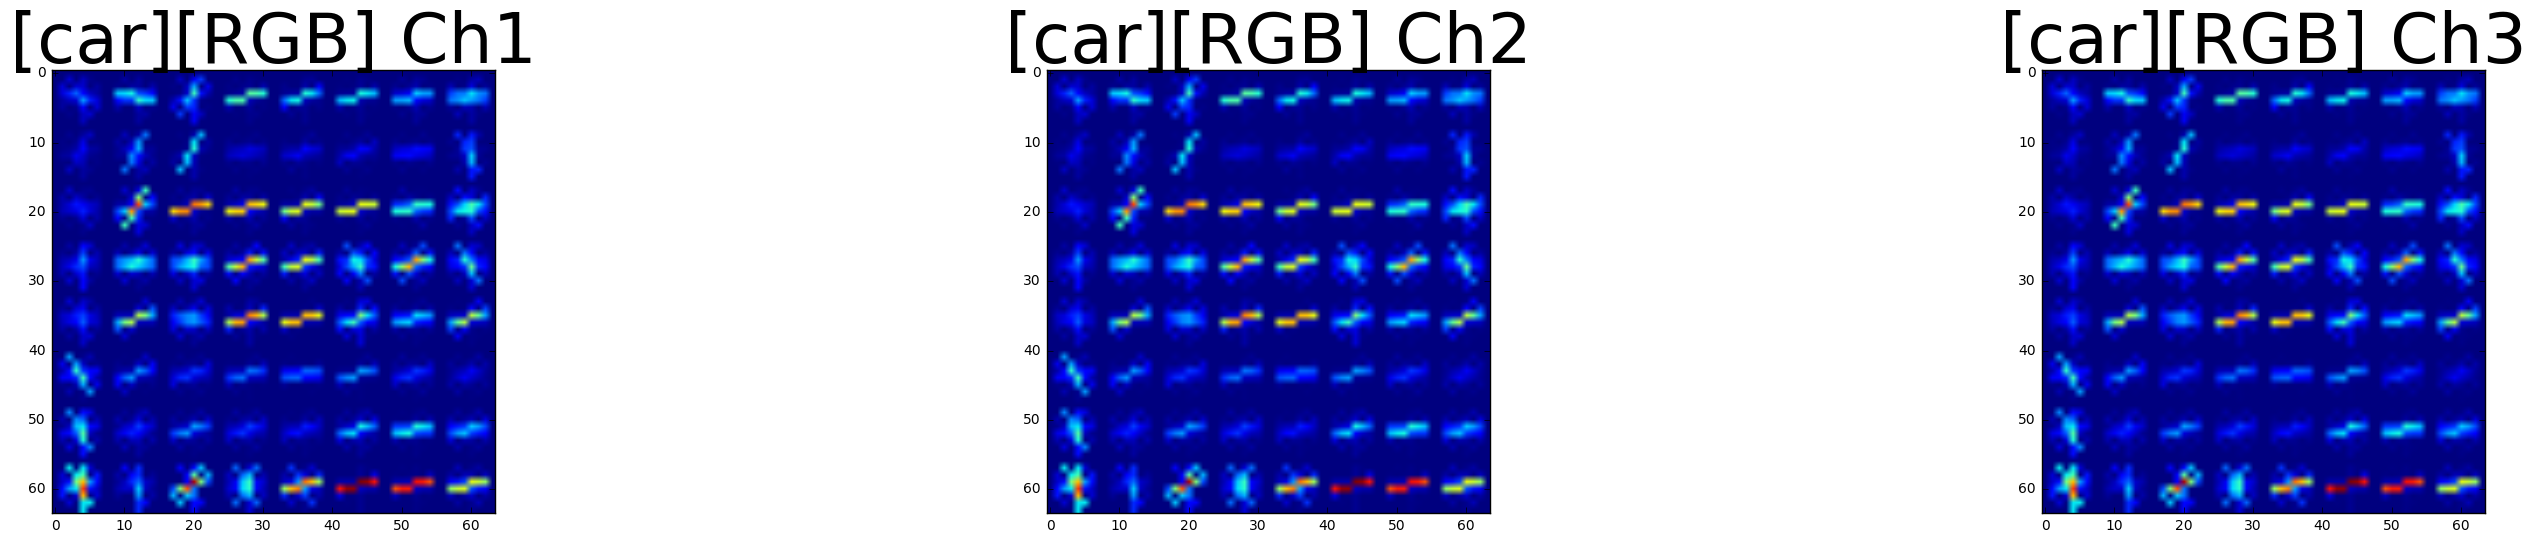

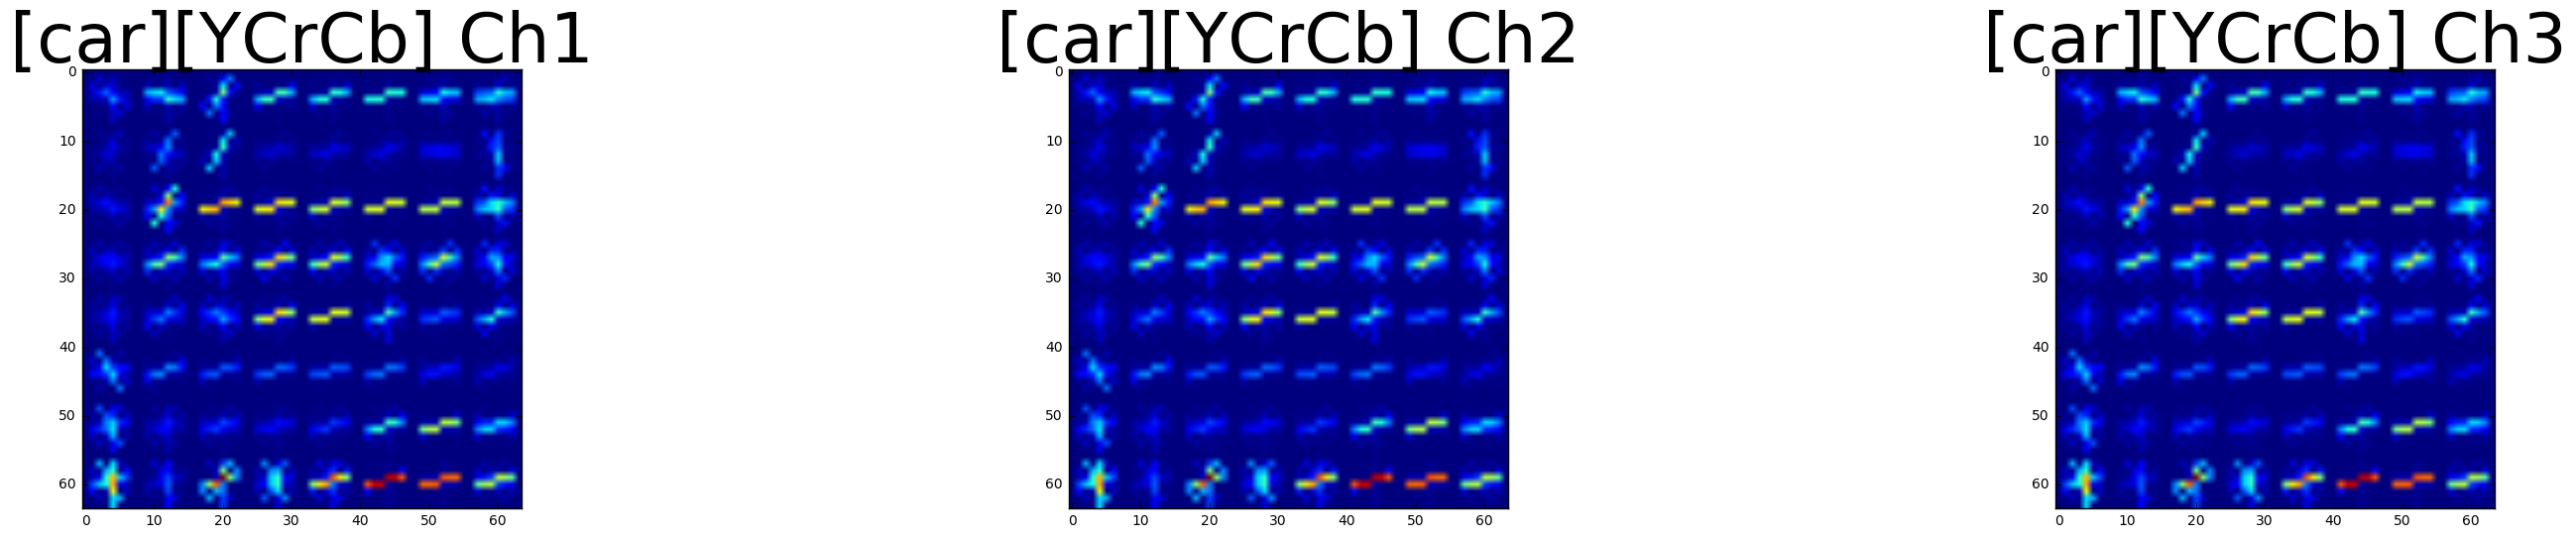

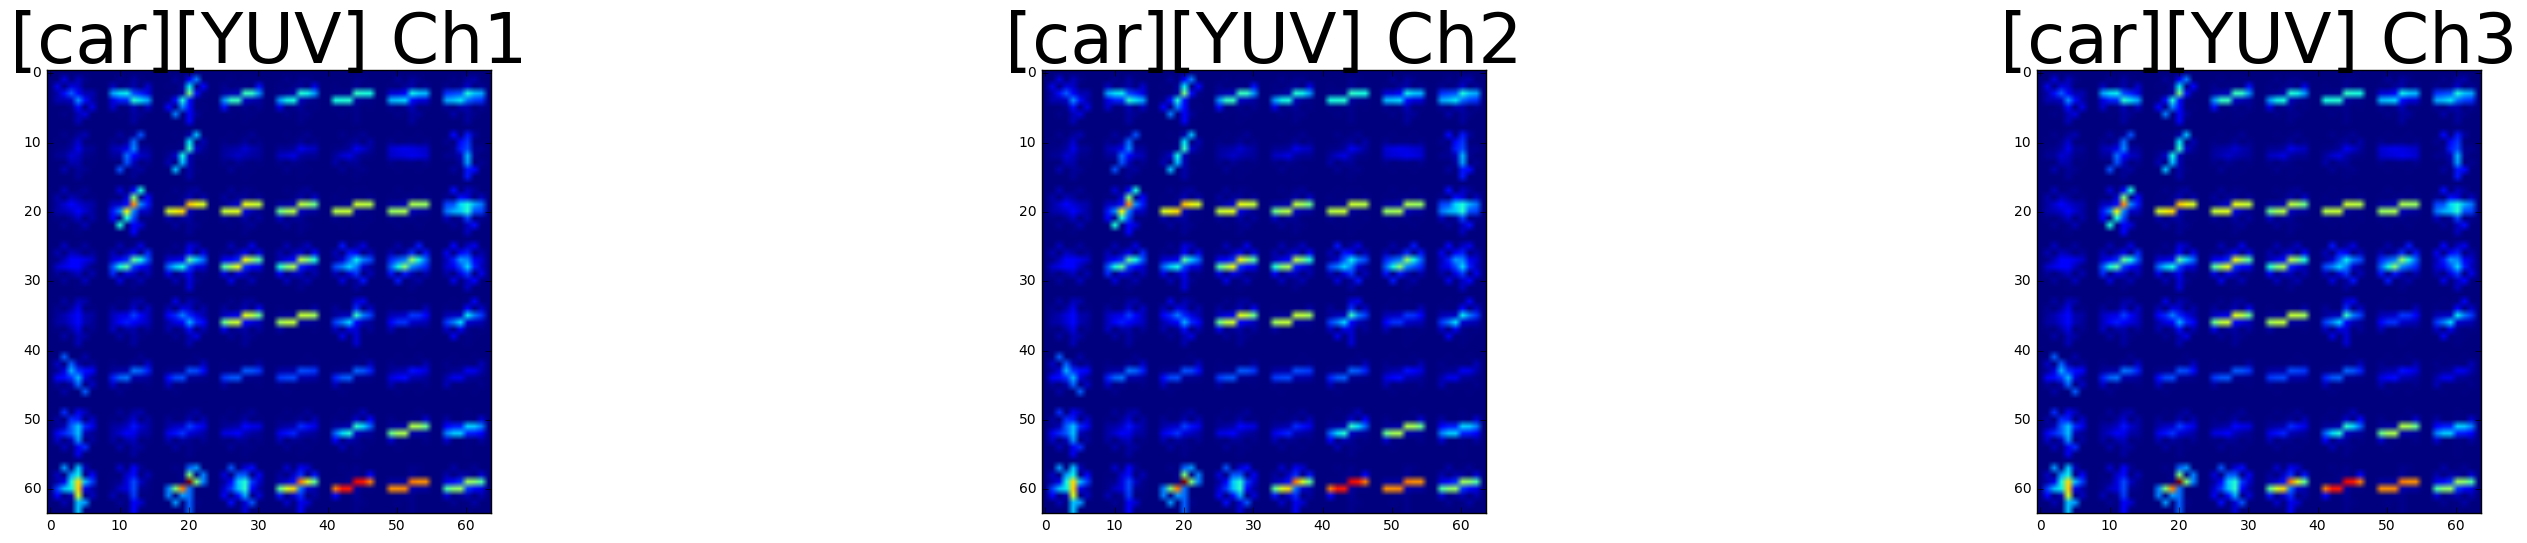

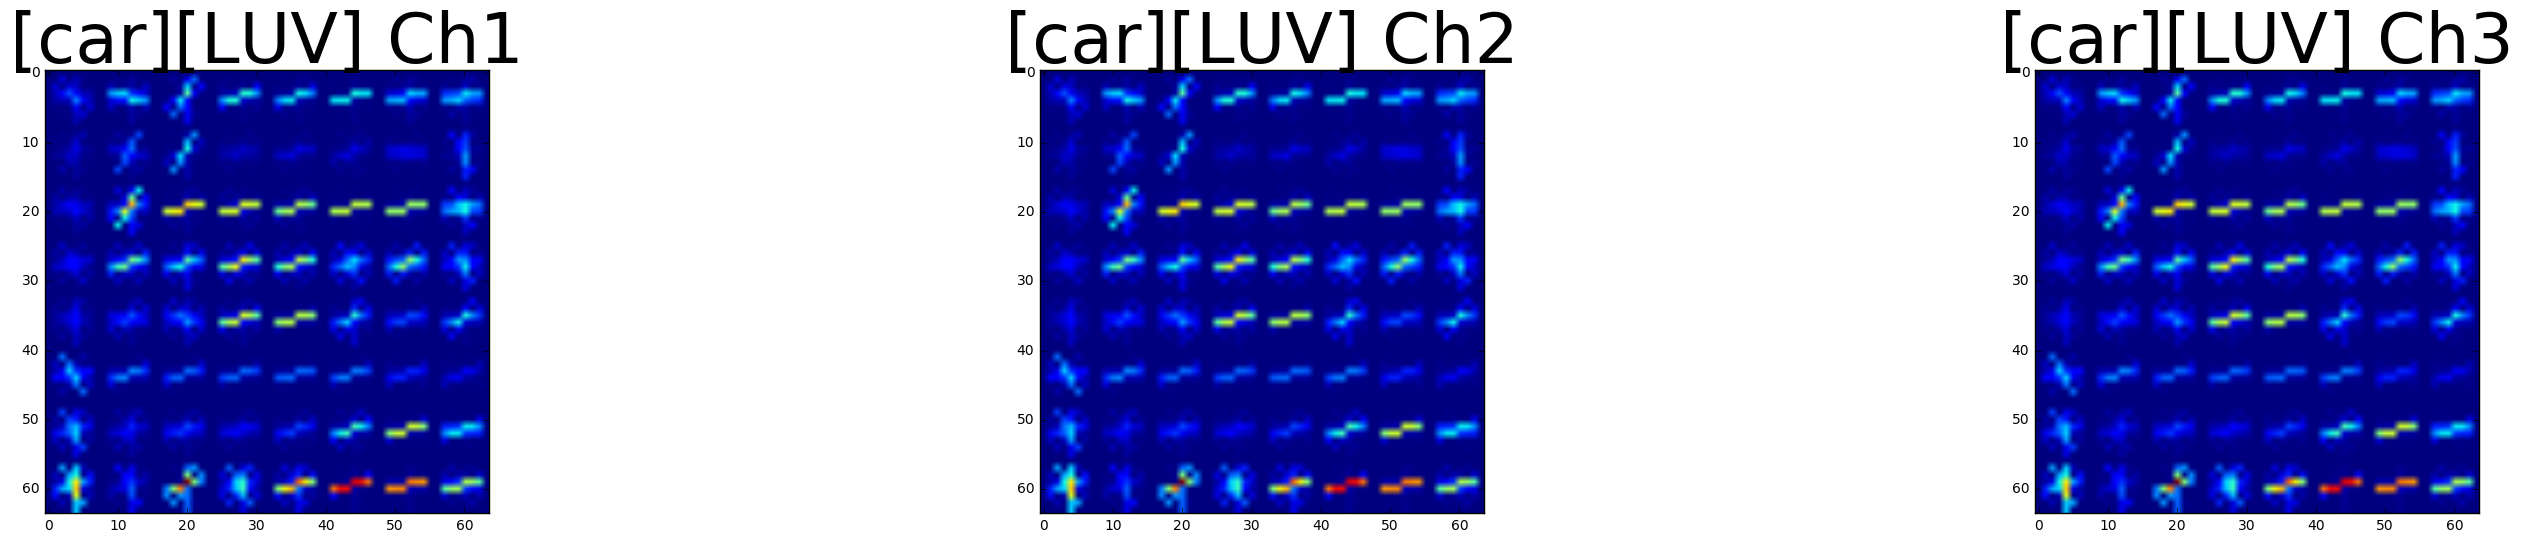

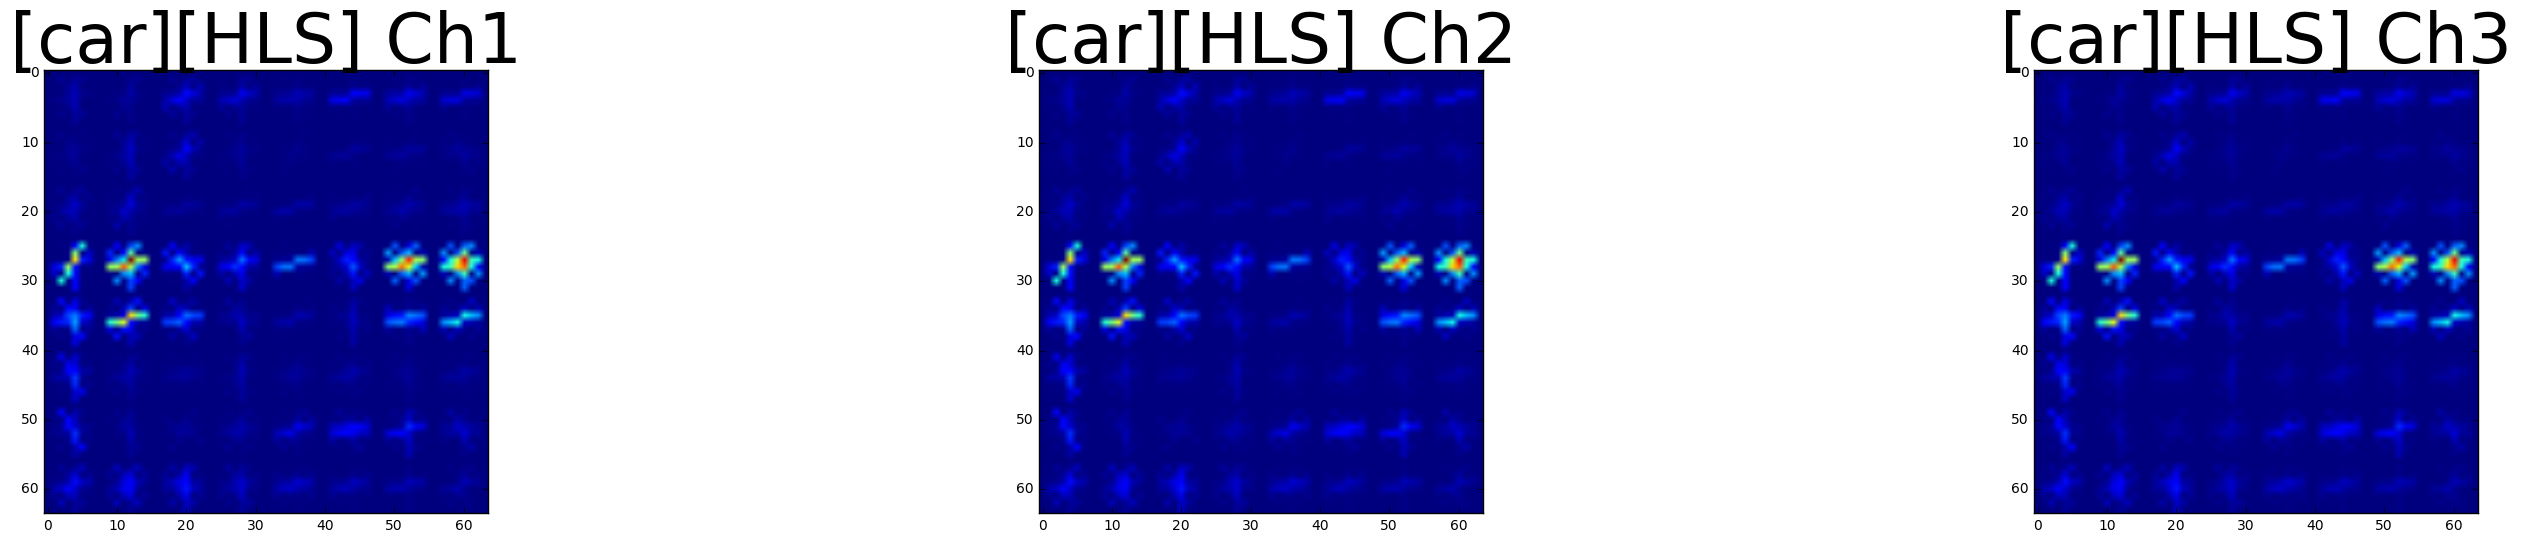

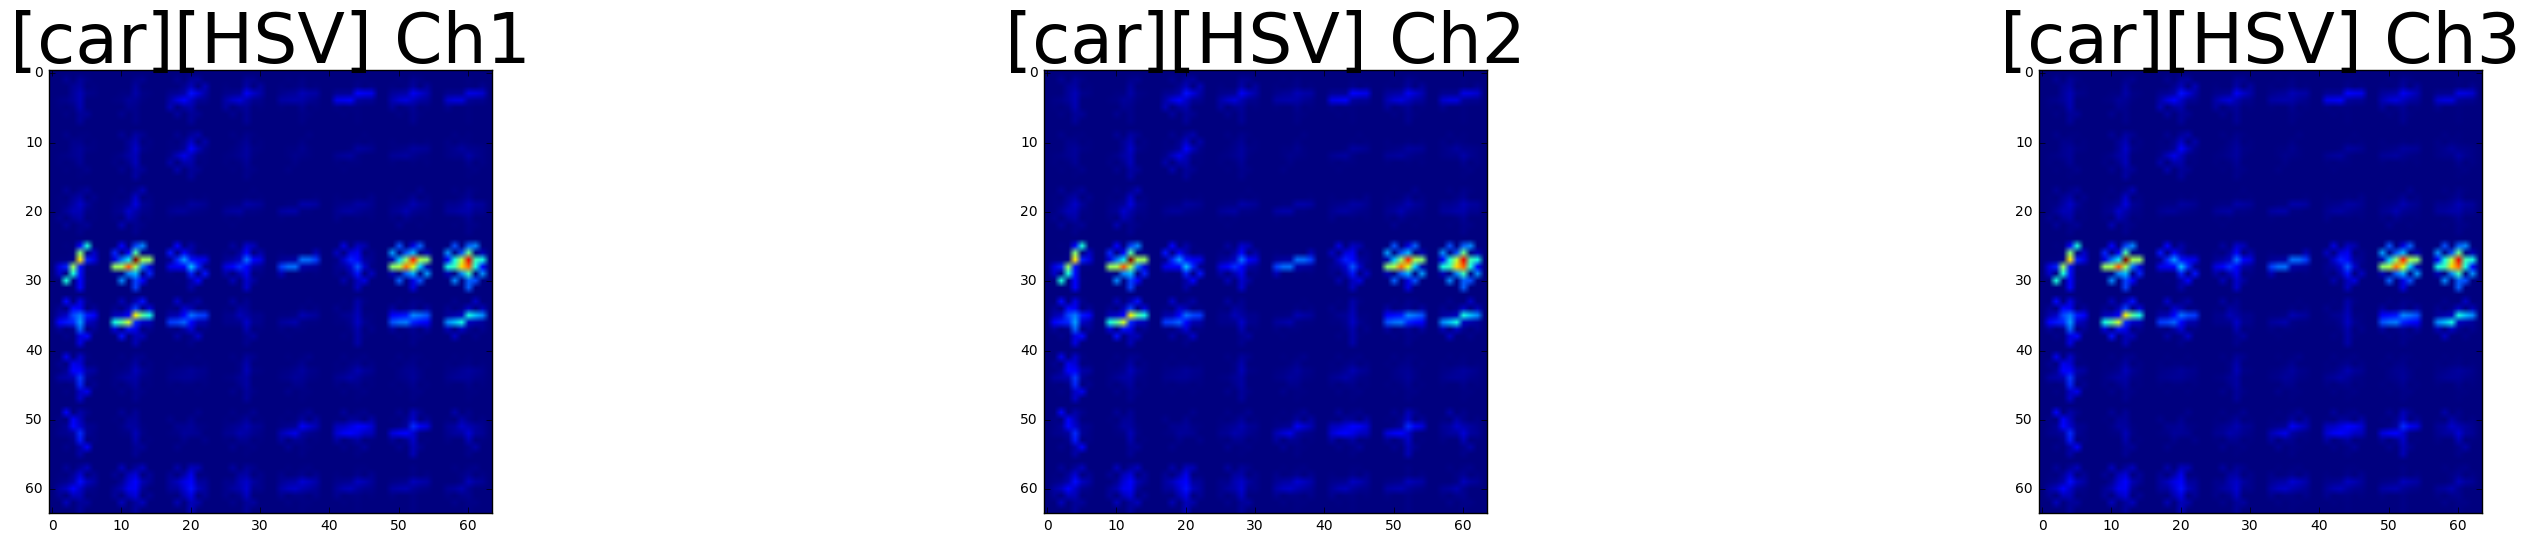

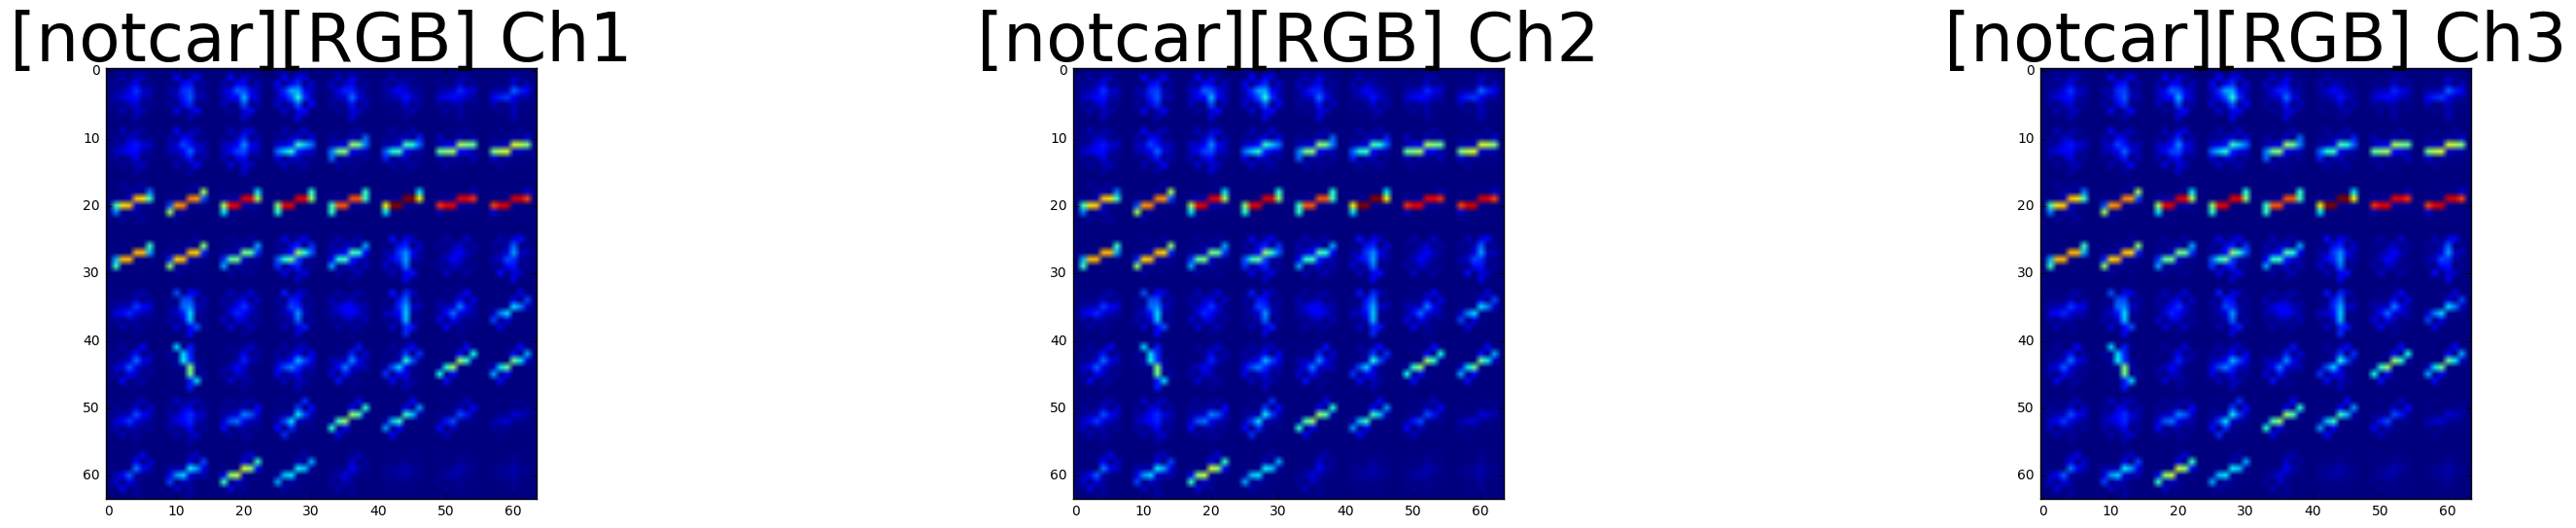

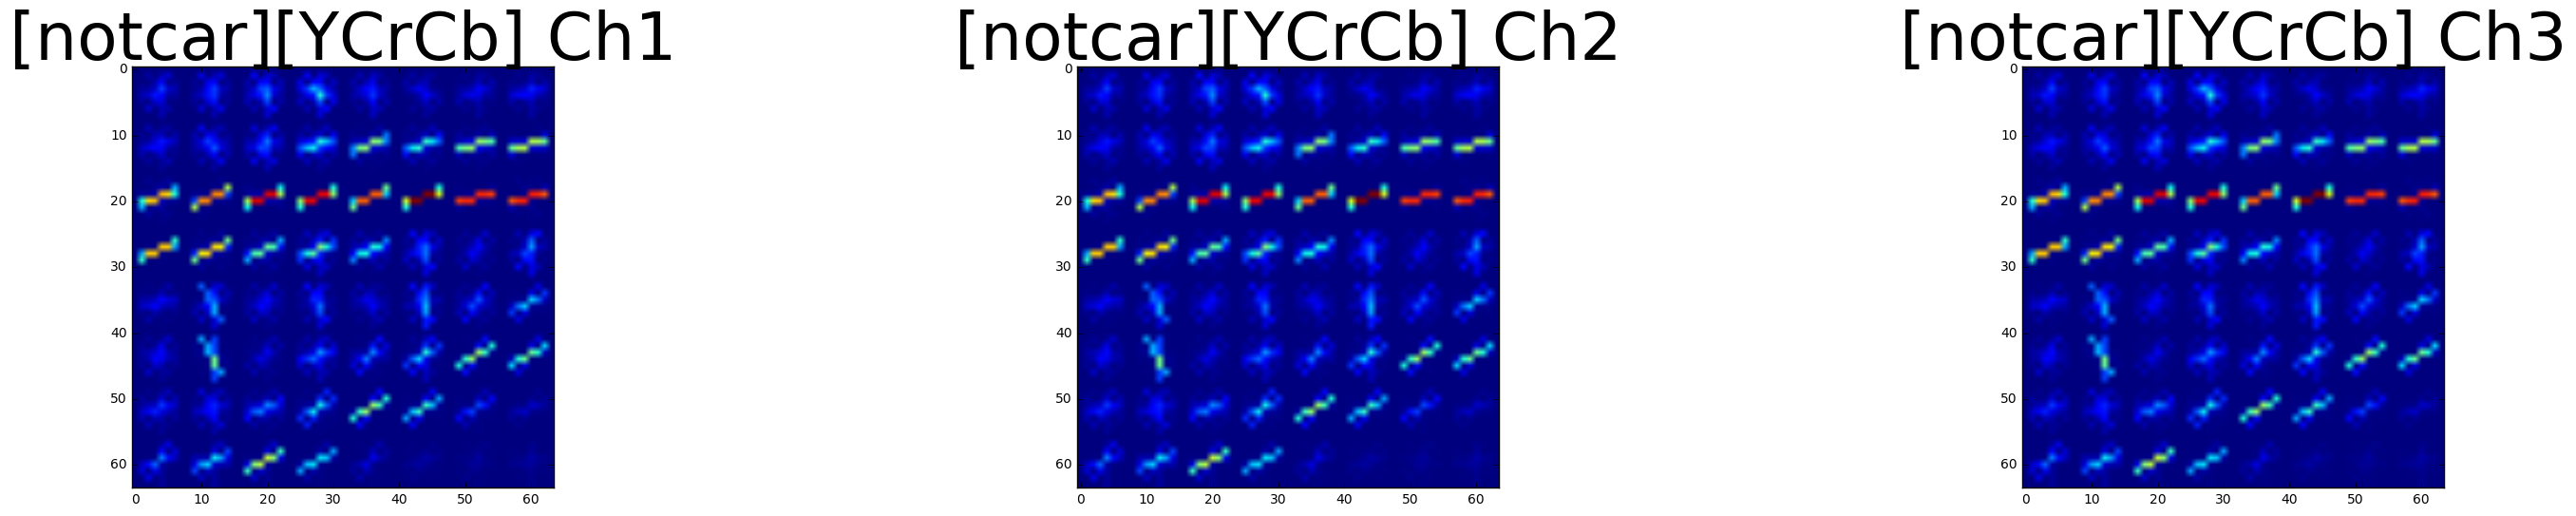

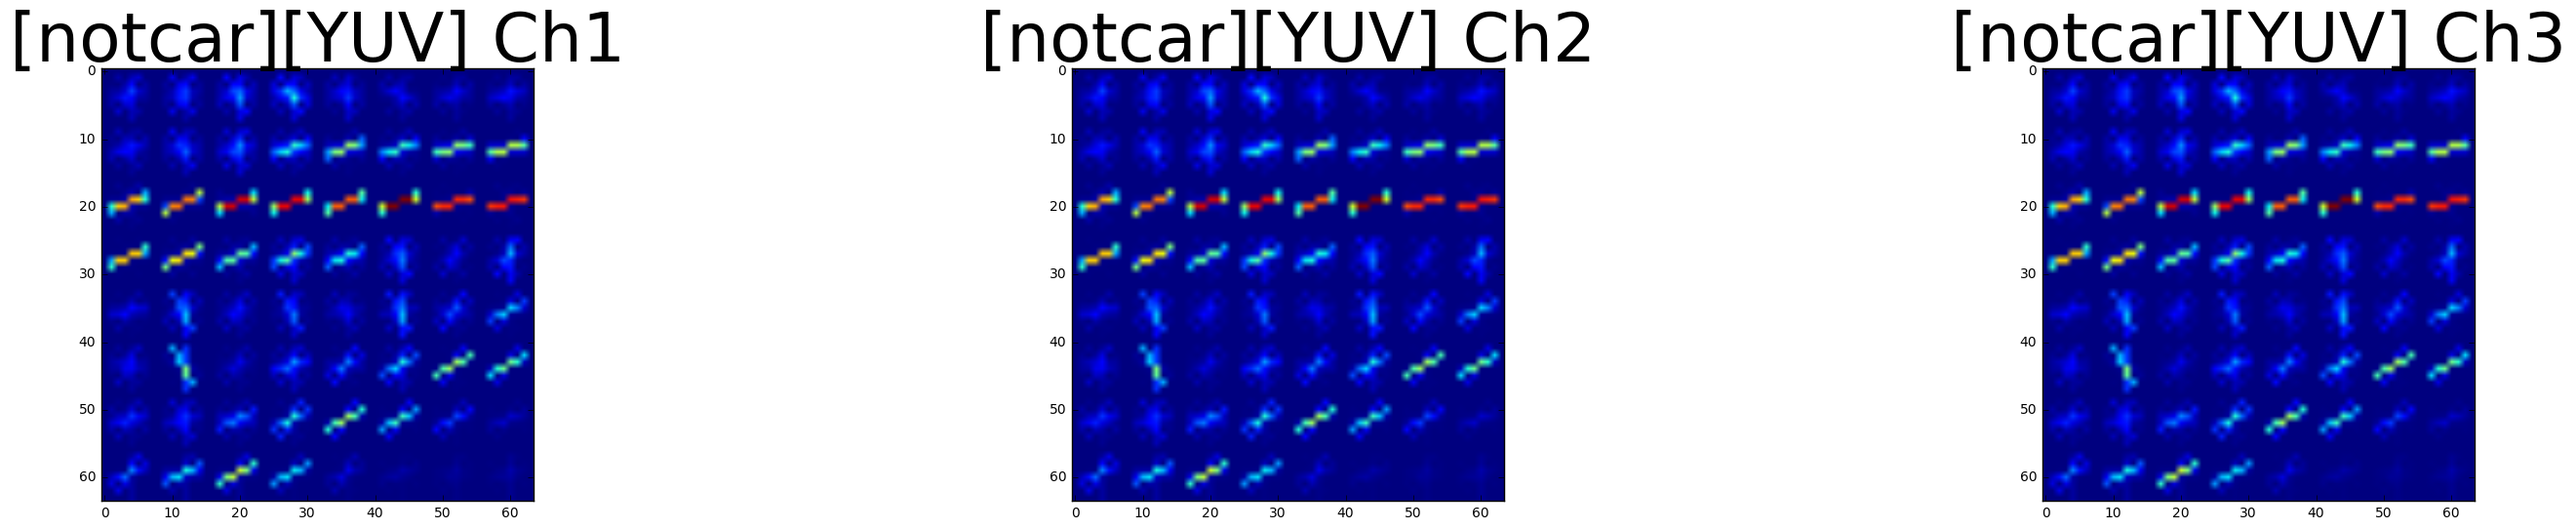

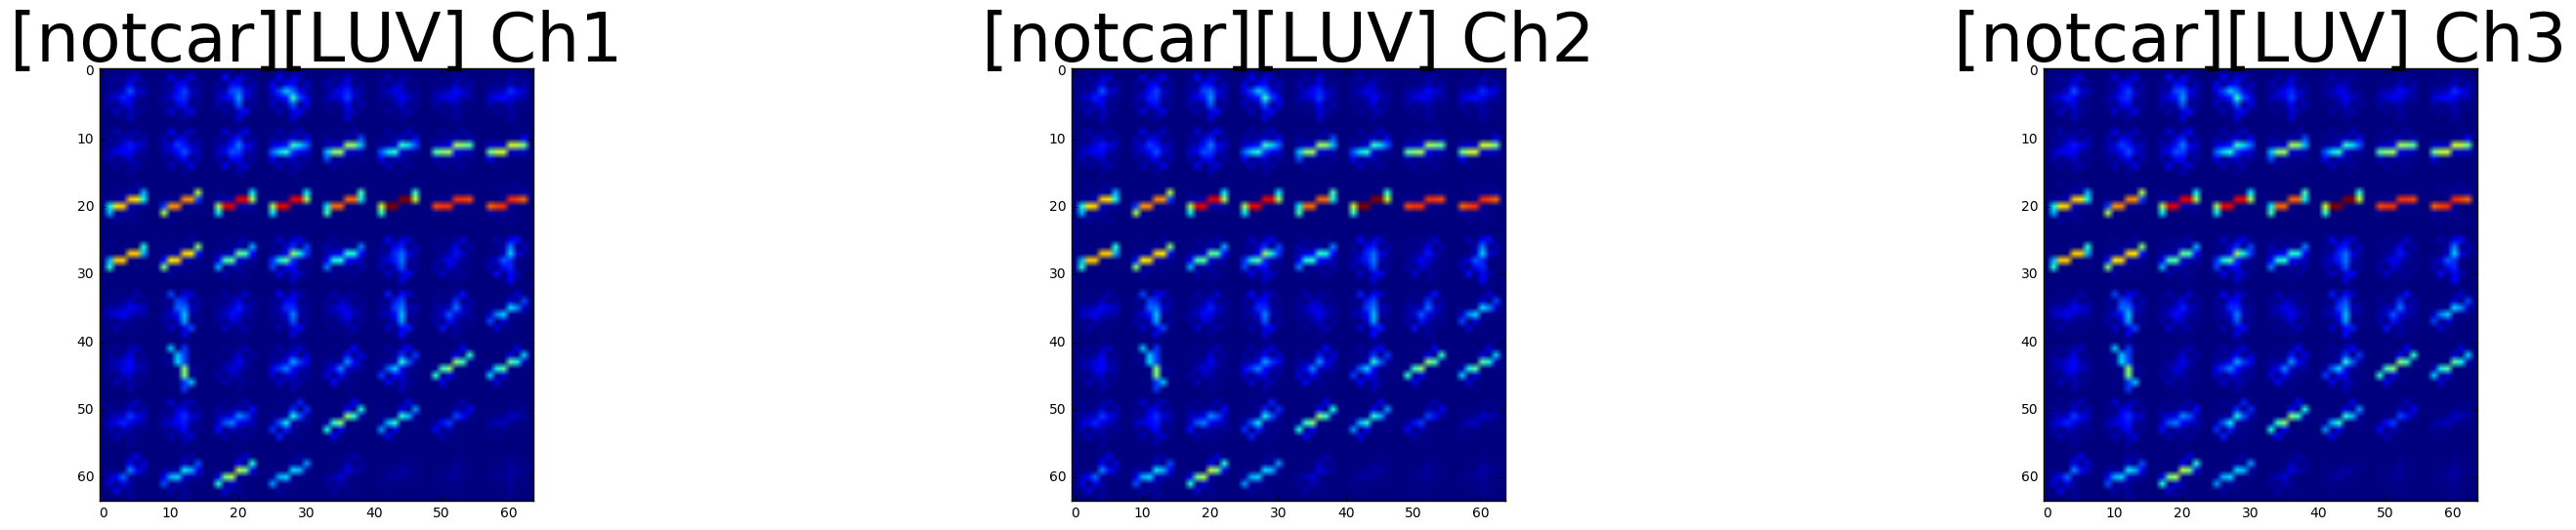

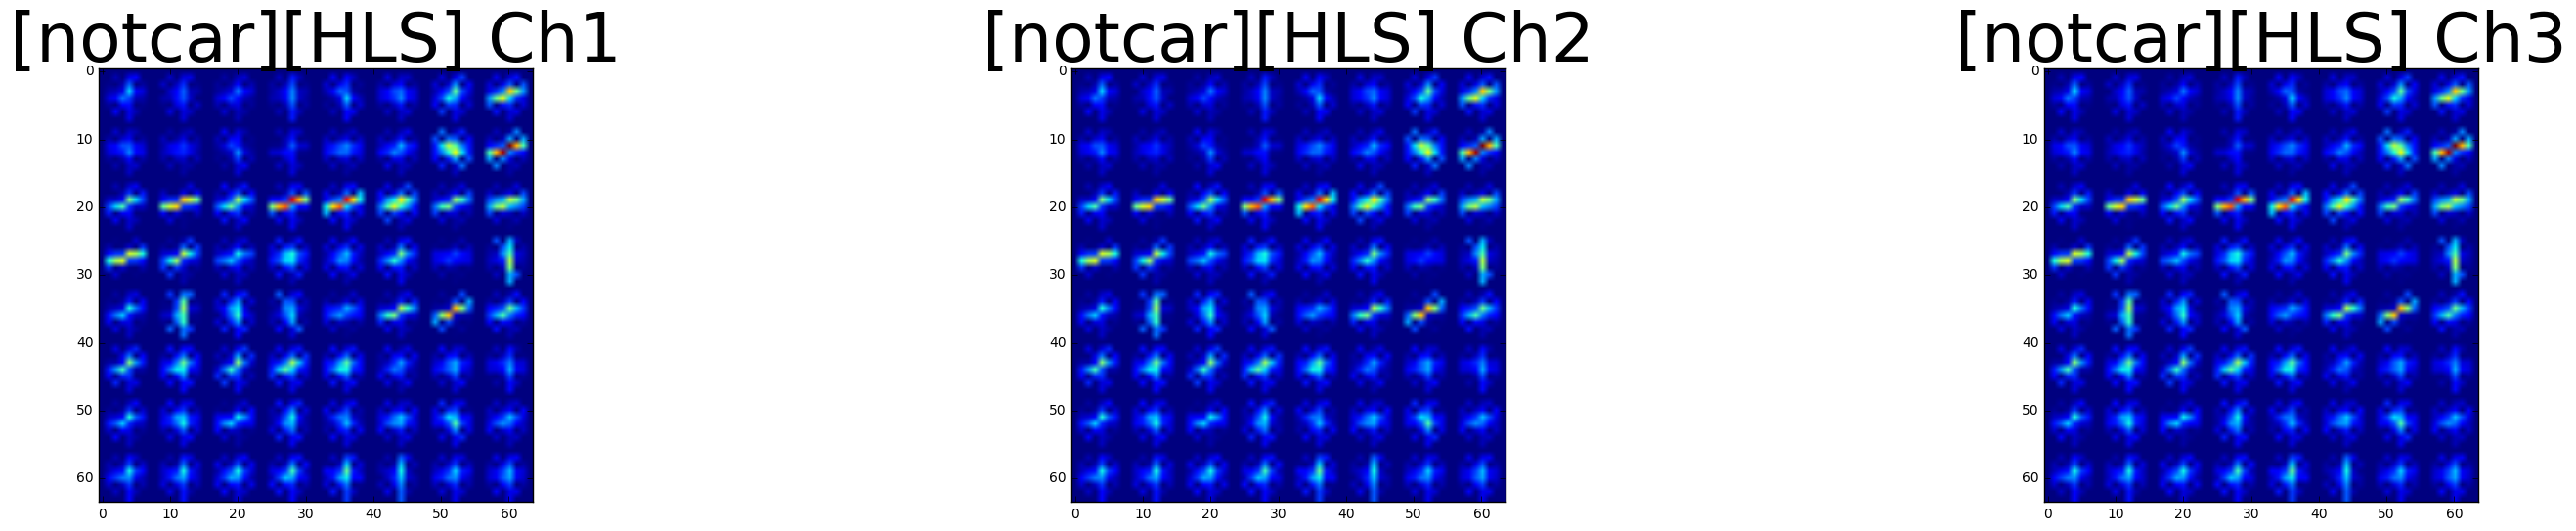

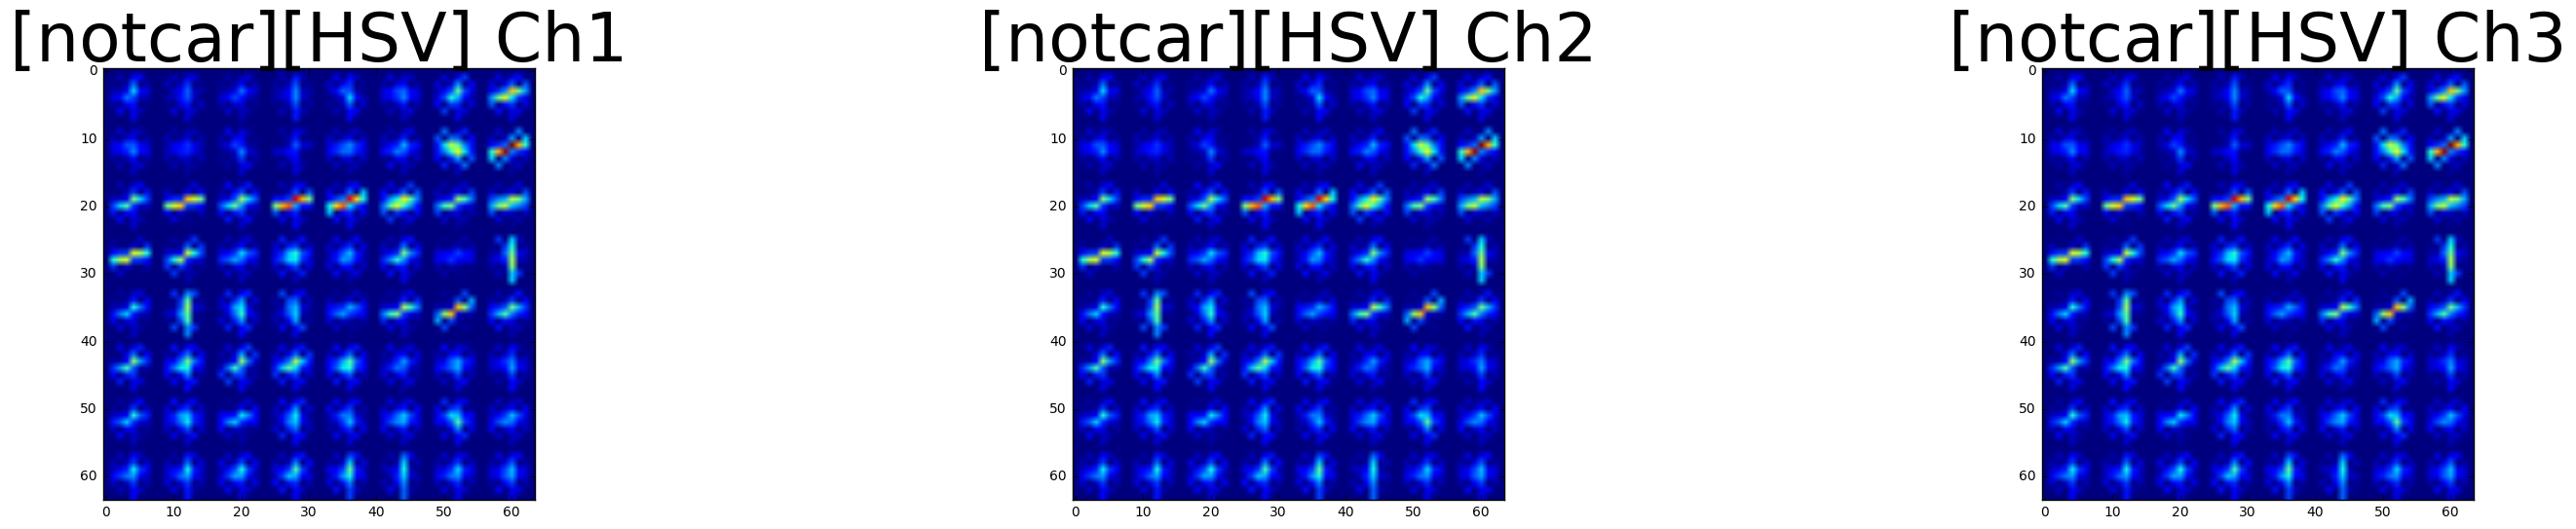

In [116]:
def check_hog(img, title=None):
    hog_features=[]
    orient=9
    pix_per_cell=8
    cell_per_block=2

    # Plot the result
    f, ax = plt.subplots(1, 3, figsize=(30, 5))
    f.tight_layout()

    for channel in range(img.shape[2]):
        hog_features.append(get_hog_features(img[:,:,channel], 
                orient, pix_per_cell, cell_per_block, vis=True, feature_vec=True))

        ax[channel].imshow(hog_features[0][1])
        ax[channel].set_title(title+' Ch'+str(channel+1), fontsize=50)

#short test of the HOG on car image
check_hog(img_car, title='[car][RGB]')
check_hog(cv2.cvtColor(img_car, cv2.COLOR_RGB2YCrCb), title='[car][YCrCb]')
check_hog(cv2.cvtColor(img_car, cv2.COLOR_RGB2YUV), title='[car][YUV]')
check_hog(cv2.cvtColor(img_car, cv2.COLOR_RGB2LUV), title='[car][LUV]')
check_hog(cv2.cvtColor(img_car, cv2.COLOR_RGB2HLS), title='[car][HLS]')
check_hog(cv2.cvtColor(img_car, cv2.COLOR_RGB2HSV), title='[car][HSV]')

#and why not test the not-car image too?
#short test of the HOG on car image
check_hog(img_notcar, title='[notcar][RGB]')
check_hog(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2YCrCb), title='[notcar][YCrCb]')
check_hog(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2YUV), title='[notcar][YUV]')
check_hog(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2LUV), title='[notcar][LUV]')
check_hog(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2HLS), title='[notcar][HLS]')
check_hog(cv2.cvtColor(img_notcar, cv2.COLOR_RGB2HSV), title='[notcar][HSV]')